# PCA on heart disease

*This notebook is inspired by a [Kaggle notebook](https://www.kaggle.com/sid321axn/principal-component-analysis-pca)*
The dataset is available at [Kaggle-disease-uci](https://www.kaggle.com/ronitf/heart-disease-uci)

This notebook aims at reducing dimensions from 13 down to 2 using PCA.

### About Dataset
The dataset contains the following features:

1. age(in years)
2. sex: (1 = male; 0 = female)
3. cp: chest pain type
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: 1 or 0 (heart disease or not)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA
%matplotlib inline
import os
#print(os.listdir("data"))

In [2]:
df = pd.read_csv('data/heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Checking missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
feat=df.drop(['target'],axis=1)
target=df['target']

#### Correlation

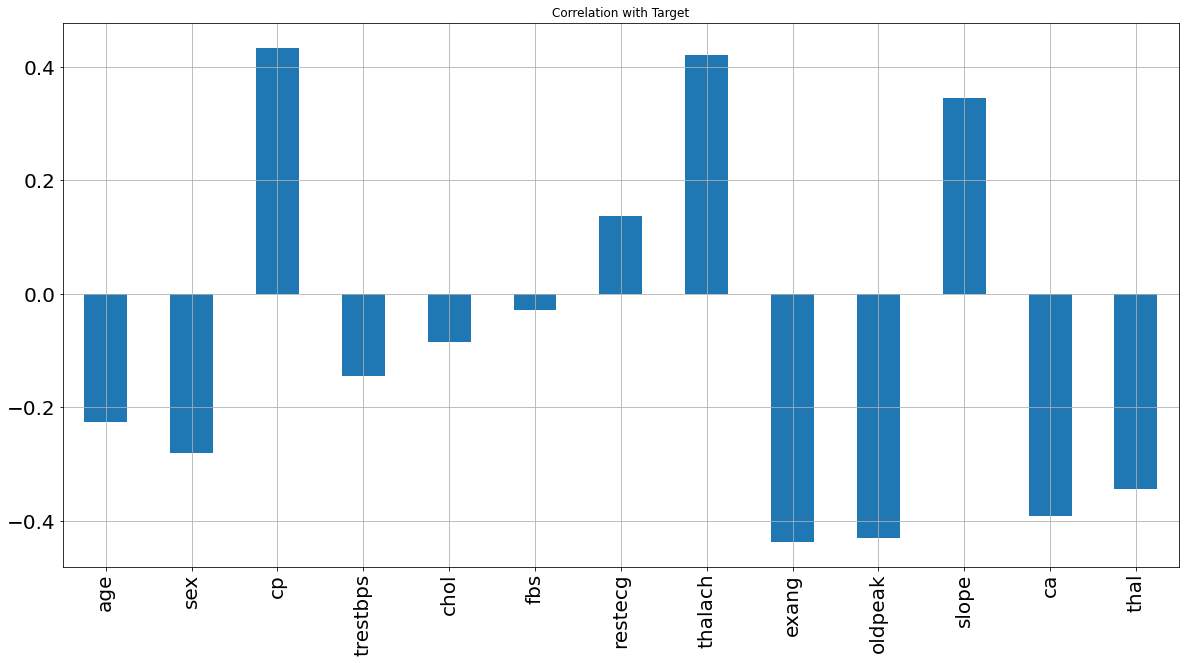

In [5]:
X=df.drop(['target'],axis=1)
X.corrwith(df['target']).plot.bar(
        figsize = (20, 10), title = "Correlation with Target", fontsize = 20,
        rot = 90, grid = True)

#### PCA
PCA is a technique which helps us in extracting a new set of variables from an existing large set of variables. These newly extracted variables are called Principal Components. Below are some of the key points you should know about PCA before proceeding further:

A principal component is a linear combination of the original variables Principal components are extracted in such a way that the first principal component explains maximum variance in the dataset Second principal component tries to explain the remaining variance in the dataset and is uncorrelated to the first principal component Third principal component tries to explain the variance which is not explained by the first two principal components and so on

As the dataset is small having less features we will use only 2 components or dimensions to see how much much variance it is covering

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(feat.values)

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

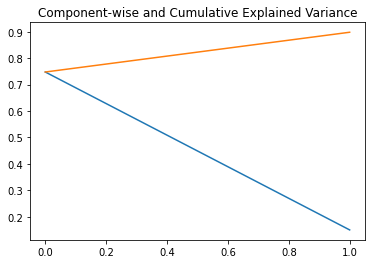

In [7]:
plt.plot(range(2), pca.explained_variance_ratio_)
plt.plot(range(2), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

In the above graph:
 - the blue line represents component-wise explained variance
 - the orange line represents the cumulative explained variance  

We are able to explain around 90% variance in the dataset using just two components. Let us now try to visualize each of these decomposed components:

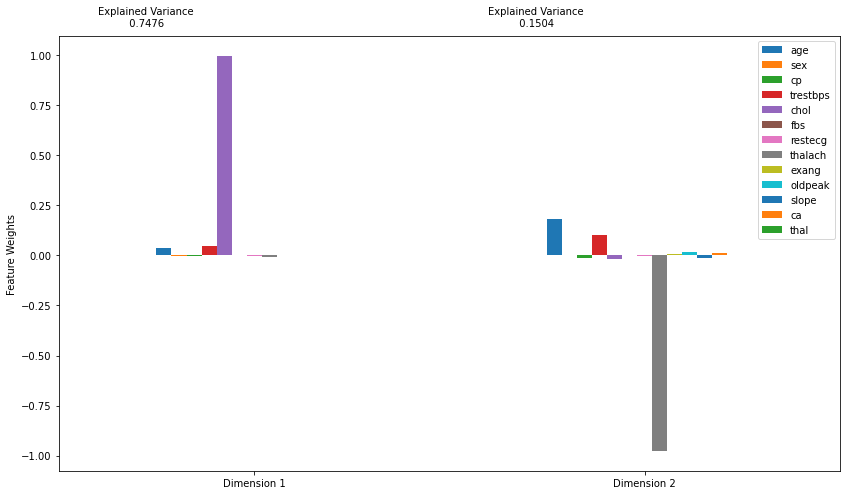

In [8]:
def pca_results(good_data, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(feat, pca)

Inference
First 2 Principal components:

**1st PC**: 74.76%
**2nd PC**: 15.04%

Total: **89.8%**

**First dimension**: From the above plot it is noticed that the weight is large and positive for **chol**, while being slightly positive for sex and cp which means that customers who score highly in this component will have very little impact on heart disease whereas people having higher cholestrol have greater chances of heart disease.

**Second Dimension**: From the above plot it is noticed that the weight is large and negative for **thalach** and slightly negative for cp,chol and slope, which means that patients who score high in this component will have very less chances of heart disease. Whereas age and trestbps are moderatively positive.